## Manhattan plot for publication

In [45]:
library('tidyr')
library('dplyr')
library('ggplot2')
library('ggrepel')
library('svglite')

In [46]:
#Load your data
gwas <- read.table(gzfile('/home/dmc2245/UKBiobank/results/REGENIE_results/results_exome_data/090921_f3393_hearing_aid_200K/090321_UKBB_Hearing_aid_f3393_expandedwhite_6436cases_96601ctrl_PC1_2_f3393.regenie.snp_stats.gz'),sep='\t', header=T)

In [47]:
head(gwas)
nrow(gwas)

,CHR,POS,REF,ALT,SNP,BETA,SE,P
,<int>,<int>,<fct>,<fct>,<fct>,<dbl>,<dbl>,<dbl>
1,1,925862,G,A,chr1:925862:G:A,-1.425140,1.279590,0.26538966
2,1,925881,G,A,chr1:925881:G:A,-0.236930,0.142267,0.09583408
3,1,925885,C,T,chr1:925885:C:T,-1.065500,2.232200,0.63312433
4,1,925908,G,GGCTCT,chr1:925908:G:GGCTCT,1.601750,1.651090,0.33198847
5,1,925915,C,T,chr1:925915:C:T,0.865111,1.417950,0.54178628
6,1,925928,G,A,chr1:925928:G:A,4.247600,2.319020,0.06700697


[1] 3029153

In [48]:
annot <- read.csv("/home/dmc2245/UKBiobank/results/REGENIE_results/results_exome_data/090921_f3393_hearing_aid_200K/091321_annotation/090321_UKBB_Hearing_aid_f3393_expandedwhite_6436cases_96601ctrl_PC1_2_f3393.regenie.hg38_multianno.formatted.csv")

In [49]:
head(annot)

,alternate_id,BETA,SE,P,Chr,Start,End,Ref,Alt,Func.refGene,...,CLNDISDB,CLNREVSTAT,CLNSIG,DN.ID,Patient.ID,Phenotype,Platform,Study,Pubmed.ID,Otherinfo1
,<fct>,<dbl>,<dbl>,<dbl>,<int>,<int>,<int>,<fct>,<fct>,<fct>,...,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>
1,chr5:272741:A:G,1.789340,0.2505260,7.055048e-11,5,272741,272741,A,G,exonic,...,.,.,.,.,.,.,.,.,.,chr5:272741:A:G 1.78934 0.250526 7.05504844050652e-11
2,chr5:272748:G:C,1.698750,0.2796450,2.479648e-08,5,272748,272748,G,C,exonic,...,.,.,.,.,.,.,.,.,.,chr5:272748:G:C 1.69875 0.279645 2.4796478021407e-08
3,chr5:272755:A:G,1.708990,0.2425330,1.335826e-10,5,272755,272755,A,G,exonic,...,.,.,.,.,.,.,.,.,.,chr5:272755:A:G 1.70899 0.242533 1.33582633172893e-10
4,chr5:73776529:T:C,0.110401,0.0192355,9.986884e-09,5,73776529,73776529,T,C,exonic,...,MedGen:CN169374,criteria_provided\x2c_single_submitter,Benign,.,.,.,.,.,.,chr5:73776529:T:C 0.110401 0.0192355 9.98688387413657e-09
5,chr5:73780632:G:A,0.106506,0.0193474,3.872398e-08,5,73780632,73780632,G,A,intronic,...,.,.,.,.,.,.,.,.,.,chr5:73780632:G:A 0.106506 0.0193474 3.87239811458644e-08
6,chr5:73780649:GT:G,0.112679,0.0194329,7.029914e-09,5,73780649,73780650,GT,G,intronic,...,.,.,.,.,.,.,.,.,.,chr5:73780649:GT:G 0.112679 0.0194329 7.02991380351023e-09


In [16]:
annot <- annot %>%
    select("alternate_id", "Gene.refGene", "avsnp150") %>%
    separate("Gene.refGene", "Gene") %>%
    rename(SNP = alternate_id)

Warning message:
“Expected 1 pieces. Additional pieces discarded in 1 rows [7].”


In [17]:
head(annot)

,SNP,Gene,avsnp150
,<fct>,<chr>,<fct>
1,chr5:272741:A:G,PDCD6,rs537688122
2,chr5:272748:G:C,PDCD6,rs549592074
3,chr5:272755:A:G,PDCD6,rs571370281
4,chr5:73776529:T:C,ARHGEF28,rs7714670
5,chr5:73780632:G:A,ARHGEF28,rs11949860
6,chr5:73780649:GT:G,ARHGEF28,rs35525194


In [50]:
snpsOfInterest <- gwas %>%
    filter(P<5e-08)

In [51]:
head(snpsOfInterest)

,CHR,POS,REF,ALT,SNP,BETA,SE,P
,<int>,<int>,<fct>,<fct>,<fct>,<dbl>,<dbl>,<dbl>
1,5,272741,A,G,chr5:272741:A:G,1.789340,0.2505260,7.055048e-11
2,5,272748,G,C,chr5:272748:G:C,1.698750,0.2796450,2.479648e-08
3,5,272755,A,G,chr5:272755:A:G,1.708990,0.2425330,1.335826e-10
4,5,73776529,T,C,chr5:73776529:T:C,0.110401,0.0192355,9.986884e-09
5,5,73780632,G,A,chr5:73780632:G:A,0.106506,0.0193474,3.872398e-08
6,5,73780649,GT,G,chr5:73780649:GT:G,0.112679,0.0194329,7.029914e-09


In [54]:
write.table(snpsOfInterest,'~/test/snpsofinterest.tsv', sep='\t', row.names=FALSE, quote=FALSE )

In [20]:
snps_annot <- merge(snpsOfInterest,annot,by="SNP")

In [21]:
snps_annot

SNP,CHR,POS,REF,ALT,BETA,SE,P,Gene,avsnp150
<fct>,<int>,<int>,<fct>,<fct>,<dbl>,<dbl>,<dbl>,<chr>,<fct>
chr5:272741:A:G,5,272741,A,G,1.789340,0.2505260,7.055048e-11,PDCD6,rs537688122
chr5:272748:G:C,5,272748,G,C,1.698750,0.2796450,2.479648e-08,PDCD6,rs549592074
chr5:272755:A:G,5,272755,A,G,1.708990,0.2425330,1.335826e-10,PDCD6,rs571370281
chr5:73776529:T:C,5,73776529,T,C,0.110401,0.0192355,9.986884e-09,ARHGEF28,rs7714670
chr5:73780632:G:A,5,73780632,G,A,0.106506,0.0193474,3.872398e-08,ARHGEF28,rs11949860
chr5:73780649:GT:G,5,73780649,GT,G,0.112679,0.0194329,7.029914e-09,ARHGEF28,rs35525194
chr5:73780686:C:A,5,73780686,C,A,0.111361,0.0192423,7.300792e-09,ARHGEF28,rs6453022
chr5:73794436:T:C,5,73794436,T,C,0.110775,0.0192598,8.822060e-09,ARHGEF28,rs7716253
chr5:73795301:T:A,5,73795301,T,A,0.109600,0.0192188,1.226168e-08,ARHGEF28,rs2973549


In [22]:
 # Prepare the dataset
  don <- gwas %>% 
  
  # Compute chromosome size
  group_by(CHR) %>% 
  summarise(chr_len=max(POS)) %>%
  # Calculate cumulative position of each chromosome
  mutate(tot=cumsum(as.numeric(chr_len))- as.numeric(chr_len)) %>%
  select(-chr_len) %>%
      
  # Add this info to the initial dataset
  left_join(gwas, ., by=c("CHR"="CHR")) %>%
  
  # Add a cumulative position of each SNP
  arrange(CHR, POS) %>%
  mutate(BPcum=POS+tot) %>%
    
  # Add highlight and annotation information
  mutate(is_highlight=ifelse(SNP %in% snpsOfInterest$SNP, "yes", "no")) %>%
  mutate(is_annotate=ifelse(P<5E-08, "yes", "no")) %>%
   
  # Filter SNP to make the plot lighter
  filter(-log10(P)>0.0005)

In [23]:
don_anno <- merge(x = don, y = snps_annot[ , c("SNP", "Gene", "avsnp150")], by = "SNP", all.x=TRUE)

In [24]:
gene_anno <- don_anno %>% 
    filter(!is.na(Gene)) %>%
    group_by(Gene) %>% 
    slice_min(order_by=P)

In [38]:
don_anno <- don_anno %>% mutate(is_top = ifelse(SNP %in% gene_anno$SNP, "yes", "no"))

In [28]:
don_anno1 %>% filter(is_top=='yes')

SNP,CHR,POS,REF,ALT,BETA,SE,P,tot,BPcum,is_highlight,is_annotate,Gene,avsnp150,is_top
<fct>,<int>,<int>,<fct>,<fct>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>,<chr>,<chr>,<fct>,<chr>
chr5:272741:A:G,5,272741,A,G,1.789340,0.2505260,7.055048e-11,879014974,879287715,yes,yes,PDCD6,rs537688122,yes
chr5:73780649:GT:G,5,73780649,GT,G,0.112679,0.0194329,7.029914e-09,879014974,952795623,yes,yes,ARHGEF28,rs35525194,yes
chr6:75362956:T:C,6,75362956,T,C,3.010130,0.4750290,2.806403e-09,1060275880,1135638836,yes,yes,FILIP1,rs765264064,yes
chr6:75841299:A:G,6,75841299,A,G,5.279510,0.9778060,5.154660e-14,1060275880,1136117179,yes,yes,MYO6,rs121912560,yes


In [35]:
axisdf = don %>% group_by(CHR) %>% summarize(center=( max(BPcum) + min(BPcum) ) / 2 )

In [36]:
head(axisdf)

CHR,center
<int>,<dbl>
1,124922126
2,369888857
3,590062616
4,784028034
5,969715532
6,1145714428


In [48]:
don_anno[don_anno$is_annotate == "yes", ] 

,SNP,CHR,POS,REF,ALT,BETA,SE,P,tot,BPcum,is_highlight,is_annotate,Gene,avsnp150
,<fct>,<int>,<int>,<fct>,<fct>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>,<chr>,<chr>,<fct>
2441618,chr5:272741:A:G,5,272741,A,G,1.789340,0.2505260,7.055048e-11,879014974,879287715,yes,yes,PDCD6,rs537688122
2441619,chr5:272748:G:C,5,272748,G,C,1.698750,0.2796450,2.479648e-08,879014974,879287722,yes,yes,PDCD6,rs549592074
2441620,chr5:272755:A:G,5,272755,A,G,1.708990,0.2425330,1.335826e-10,879014974,879287729,yes,yes,PDCD6,rs571370281
2468748,chr5:73776529:T:C,5,73776529,T,C,0.110401,0.0192355,9.986884e-09,879014974,952791503,yes,yes,ARHGEF28,rs7714670
2468764,chr5:73780632:G:A,5,73780632,G,A,0.106506,0.0193474,3.872398e-08,879014974,952795606,yes,yes,ARHGEF28,rs11949860
2468766,chr5:73780649:GT:G,5,73780649,GT,G,0.112679,0.0194329,7.029914e-09,879014974,952795623,yes,yes,ARHGEF28,rs35525194
2468768,chr5:73780686:C:A,5,73780686,C,A,0.111361,0.0192423,7.300792e-09,879014974,952795660,yes,yes,ARHGEF28,rs6453022
2468784,chr5:73794436:T:C,5,73794436,T,C,0.110775,0.0192598,8.822060e-09,879014974,952809410,yes,yes,ARHGEF28,rs7716253
2468792,chr5:73795301:T:A,5,73795301,T,A,0.109600,0.0192188,1.226168e-08,879014974,952810275,yes,yes,ARHGEF28,rs2973549


In [49]:
z <- subset(don_anno, is_highlight=="yes")

In [50]:
z_group <- z %>% group_by(Gene) 

In [51]:
z_group

SNP,CHR,POS,REF,ALT,BETA,SE,P,tot,BPcum,is_highlight,is_annotate,Gene,avsnp150
<fct>,<int>,<int>,<fct>,<fct>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>,<chr>,<chr>,<fct>
chr5:272741:A:G,5,272741,A,G,1.789340,0.2505260,7.055048e-11,879014974,879287715,yes,yes,PDCD6,rs537688122
chr5:272748:G:C,5,272748,G,C,1.698750,0.2796450,2.479648e-08,879014974,879287722,yes,yes,PDCD6,rs549592074
chr5:272755:A:G,5,272755,A,G,1.708990,0.2425330,1.335826e-10,879014974,879287729,yes,yes,PDCD6,rs571370281
chr5:73776529:T:C,5,73776529,T,C,0.110401,0.0192355,9.986884e-09,879014974,952791503,yes,yes,ARHGEF28,rs7714670
chr5:73780632:G:A,5,73780632,G,A,0.106506,0.0193474,3.872398e-08,879014974,952795606,yes,yes,ARHGEF28,rs11949860
chr5:73780649:GT:G,5,73780649,GT,G,0.112679,0.0194329,7.029914e-09,879014974,952795623,yes,yes,ARHGEF28,rs35525194
chr5:73780686:C:A,5,73780686,C,A,0.111361,0.0192423,7.300792e-09,879014974,952795660,yes,yes,ARHGEF28,rs6453022
chr5:73794436:T:C,5,73794436,T,C,0.110775,0.0192598,8.822060e-09,879014974,952809410,yes,yes,ARHGEF28,rs7716253
chr5:73795301:T:A,5,73795301,T,A,0.109600,0.0192188,1.226168e-08,879014974,952810275,yes,yes,ARHGEF28,rs2973549


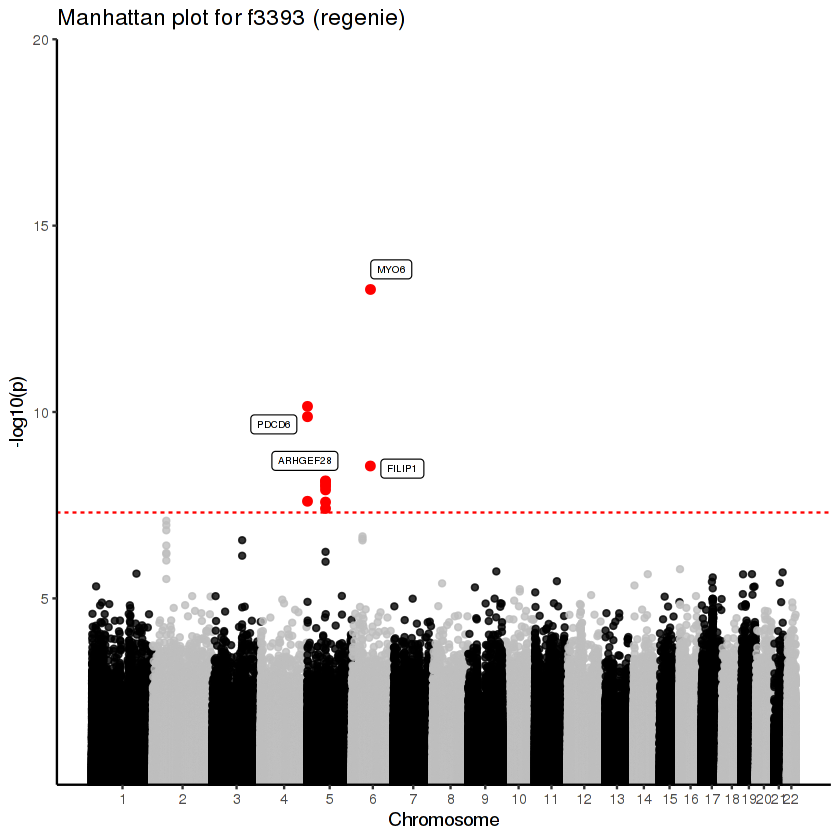

In [41]:
annotate=TRUE
sig <- 5e-8
y_limits <- c(8, NA)

    manhplot <- ggplot(don_anno, aes(x=BPcum, y=-log10(P))) +
    
    # Show all points
    geom_point( aes(color=as.factor(CHR)), alpha=0.8, size=1.3) +
    scale_color_manual(values = rep(c("black", "grey"), 22 )) +
    
    # custom X axis:
    scale_x_continuous(label = axisdf$CHR, breaks= axisdf$center ) +
    scale_y_continuous(expand = c(0, 0), limits=c(NA, 20)) +   # remove space between plot area and x axis
    
    # Add highlighted points
    geom_point(data=subset(don_anno,is_highlight=='yes'), color='red', size=2) +
    
    # Add significance level line

    geom_hline(yintercept = -log10(sig), color = "red", linetype = "dashed") +

    #create X and Y axes labels
    labs(x = "Chromosome",
         y = "-log10(p)",
         title ='Manhattan plot for f3393 (regenie)') +
    
    # Custom the theme:
    theme_classic() +
    theme( 
      legend.position="none",
      panel.border = element_blank(),
      panel.grid.major.x = element_blank(),
      panel.grid.minor.x = element_blank()
    ) 

   manhplot +  if (annotate==TRUE){
          geom_label_repel( data=subset(don_anno, is_top=='yes'), aes(label=Gene), size=2,  max.overlaps = Inf, ylim = y_limits, box.padding = unit(0.35, "lines"), point.padding = unit(0.5, "lines")) 
    } else {
          geom_label_repel( data=subset(don_anno, is_annotate=="yes"), aes(label=Gene), size=2,  max.overlaps = Inf, ylim = y_limits) 
    } 

In [54]:
    ggsave('~/test/test.pdf', plot=manhplot, width = 5, height = 4, units = "in", device='pdf')

In [43]:
    ggsave('~/test/test.eps', plot=manhplot, width = 5, height = 4, units = "in", device='eps')

In [55]:
    ggsave('~/test/test.svg', plot=manhplot, width = 5, height = 4, units = "in", device='svg')

bash: syntax error near unexpected token `'~/test/test.svg','



In [61]:
library(devEMF)
emf('~/test/test.emf')
print(manhplot)
dev.off()

png 
  2

In [54]:
ylim <- abs(floor(log10(min(don$P))))

In [55]:
ylim

[1] 14

In [ ]:
min.segment.length = 0, nudge_y=0.8, direction='both', box.padding = unit(0.35, "lines"), point.padding = unit(0.5, "lines")

In [ ]:
sos dryrun /home/dmc2245/project/bioworkflows/GWAS/LMM.ipynb \
    regenie\
    --cwd /home/dmc2245/UKBiobank/results/REGENIE_results/results_exome_data/090921_f3393_hearing_aid_200K \
    --bfile /home/dmc2245/UKBiobank/genotype_files_processed/090221_sample_variant_qc_final_callrate90/cache/UKB_genotypedatadownloaded083019.090221_sample_variant_qc_final_callrate90.filtered.extracted.bed \
    --genoFile /home/dmc2245/UKBiobank/data/exome_files/project_VCF/072721_run/plink/ukb23156_c1.merged.filtered.bed /home/dmc2245/UKBiobank/data/exome_files/project_VCF/072721_run/plink/ukb23156_c2.merged.filtered.bed /home/dmc2245/UKBiobank/data/exome_files/project_VCF/072721_run/plink/ukb23156_c3.merged.filtered.bed /home/dmc2245/UKBiobank/data/exome_files/project_VCF/072721_run/plink/ukb23156_c4.merged.filtered.bed /home/dmc2245/UKBiobank/data/exome_files/project_VCF/072721_run/plink/ukb23156_c5.merged.filtered.bed /home/dmc2245/UKBiobank/data/exome_files/project_VCF/072721_run/plink/ukb23156_c6.merged.filtered.bed /home/dmc2245/UKBiobank/data/exome_files/project_VCF/072721_run/plink/ukb23156_c7.merged.filtered.bed /home/dmc2245/UKBiobank/data/exome_files/project_VCF/072721_run/plink/ukb23156_c8.merged.filtered.bed /home/dmc2245/UKBiobank/data/exome_files/project_VCF/072721_run/plink/ukb23156_c9.merged.filtered.bed /home/dmc2245/UKBiobank/data/exome_files/project_VCF/072721_run/plink/ukb23156_c10.merged.filtered.bed /home/dmc2245/UKBiobank/data/exome_files/project_VCF/072721_run/plink/ukb23156_c11.merged.filtered.bed /home/dmc2245/UKBiobank/data/exome_files/project_VCF/072721_run/plink/ukb23156_c12.merged.filtered.bed /home/dmc2245/UKBiobank/data/exome_files/project_VCF/072721_run/plink/ukb23156_c13.merged.filtered.bed /home/dmc2245/UKBiobank/data/exome_files/project_VCF/072721_run/plink/ukb23156_c14.merged.filtered.bed /home/dmc2245/UKBiobank/data/exome_files/project_VCF/072721_run/plink/ukb23156_c15.merged.filtered.bed /home/dmc2245/UKBiobank/data/exome_files/project_VCF/072721_run/plink/ukb23156_c16.merged.filtered.bed /home/dmc2245/UKBiobank/data/exome_files/project_VCF/072721_run/plink/ukb23156_c17.merged.filtered.bed /home/dmc2245/UKBiobank/data/exome_files/project_VCF/072721_run/plink/ukb23156_c18.merged.filtered.bed /home/dmc2245/UKBiobank/data/exome_files/project_VCF/072721_run/plink/ukb23156_c19.merged.filtered.bed /home/dmc2245/UKBiobank/data/exome_files/project_VCF/072721_run/plink/ukb23156_c20.merged.filtered.bed /home/dmc2245/UKBiobank/data/exome_files/project_VCF/072721_run/plink/ukb23156_c21.merged.filtered.bed /home/dmc2245/UKBiobank/data/exome_files/project_VCF/072721_run/plink/ukb23156_c22.merged.filtered.bed\
    --phenoFile /home/dmc2245/UKBiobank/phenotype_files/hearing_impairment/090321_UKBB_Hearing_aid_f3393_expandedwhite_6436cases_96601ctrl_PC1_2.tsv \
    --formatFile /home/dmc2245/project/UKBB_GWAS_dev/data/regenie_template.yml \
    --phenoCol f3393\
    --covarCol sex  \
    --qCovarCol age PC1 PC2\
    --bsize 1000\
    --lowmem_dir /home/dmc2245/scratch60/predictions\
    --trait bt \
    --bgenMinMAF 0.001 \
    --bgenMinINFO 0.8\
    --maf_filter 0\
    --geno_filter 0\
    --hwe_filter 0\
    --mind_filter 0\
    --minMAC 4\
    --job_size 1\
    --ylim 0\
    --reverse_log_p True\
    --numThreads 20\
    --anno_file /home/dmc2245/UKBiobank/results/REGENIE_results/results_exome_data/090921_f3393_hearing_aid_200K/091321_annotation/*.formatted.csv\
    --label_annotate avsnp150\
    --annotate\
    --container_lmm /home/dmc2245/containers/lmm.sif\
    --container_marp /home/dmc2245/containers/marp.sif\
    -s build

In [ ]:
[manhattan]
# Column name for BP
parameter: bp = 'POS'
# Column name for p-value
parameter: pval = 'P'
# Column name for SNP
parameter: snp = 'SNP'
# Plot only on p-values smaller than this
parameter: p_filter = '0.05'
# Higlight SNPs with P-values lower than this
parameter: sigp = 5e-08
# ylim set to 0 to use maximum -log10(p) in data
parameter: ylim = 0
# Path to the annotation file if present
parameter: anno_file = path()
# The label to annotate in the manhattan plot options are (SNP, avsnp150, Gene)
parameter: label_annotate = str 
parameter: cwd = path
parameter: gwas = path
parameter: annotate = False
parameter: container_lmm = 'statisticalgenetics/lmm:2.6'
input: gwas
output: annotated_manhattan = f'{_input[0]:nn}.manhattan_annotated.png',
        plot_data = f'{_input[0]:nn}.plot_data.rds',
        svg = f'{_input[0]:nn}.manhattan_annotated.pdf'
task: trunk_workers = 1, trunk_size = job_size, walltime = '3h', mem = '64G', tags = f'{step_name}_{_output[0]:bn}'    
bash: container=container_lmm, expand = "${ }"
R: container=container_lmm, expand='${ }', stderr = f'{_output[0]:n}.stderr', stdout = f'{_output[0]:n}.stdout'
    
    library('dplyr')
    library('ggrepel')
    library('tidyr')
    library('ggplot2')
    #Load your data
    gwas <- read.table(gzfile('${_input}'),sep='\t', header=T)
    # Select SNPs of interest
    snpsOfInterest <- gwas %>%
        filter(${pval}<${sigp})
    # Read in the annotation file if present
    if (${"TRUE" if annotate else "FALSE"}) {
         print("The annotation file has been provided")
         annot <- read.csv('${anno_file}')
         annot <- annot %>%
         select("alternate_id", "Gene.refGene", "avsnp150") %>%
         separate("Gene.refGene", "Gene") %>%
         rename(SNP = alternate_id)
     # Merge snps of interest with the annotation info
         snps_annot <- merge(snpsOfInterest,annot,by="SNP")
        } else {  
            print("The annotation file has not been provided")
        }
  
    # Prepare the dataset
    dat <- gwas %>%  
    # Compute chromosome size
    group_by(CHR) %>% 
    summarise(chr_len=max(${bp})) %>%
    # Calculate cumulative position of each chromosome
    mutate(tot=cumsum(as.numeric(chr_len))- as.numeric(chr_len)) %>%
    select(-chr_len) %>%      
    # Add this info to the initial dataset
    left_join(gwas, ., by=c("CHR"="CHR")) %>%
    # Add a cumulative position of each SNP
    arrange(CHR, ${bp}) %>%
    mutate(BPcum=${bp}+tot) %>%  
    # Add highlight and annotation information
    mutate(is_highlight=ifelse(${snp} %in% snpsOfInterest$SNP, "yes", "no")) %>%
    mutate(is_annotate=ifelse(${pval}<${sigp}, "yes", "no")) %>%
    # Filter SNP to make the plot lighter
    filter(-log10(P)>${p_filter})
    
    # Merge the gwas filtered data with the annotation
    if (${"TRUE" if annotate else "FALSE"}) {
          print("Merging the gwas results with the annotation file")
          dat_anno <- merge(x = dat, y = snps_annot[ , c("SNP", "Gene", "avsnp150")], by = "SNP", all.x=TRUE)
          gene_anno <- dat_anno %>% 
              filter(!is.na(Gene)) %>%
              group_by(Gene) %>% 
              slice_min(order_by=P)
          dat_anno <- dat_anno %>% mutate(is_top = ifelse(SNP %in% gene_anno$SNP, "yes", "no"))
        } else {
           print("The gwas results are keep as they are because no annotation file is provided")
          dat_anno <- dat
        }
    
    # Create axis for the manhattan plot
    axisdf = dat %>% group_by(CHR) %>% summarize(center=( max(BPcum) + min(BPcum) ) / 2 )
  
    # Make the plot
    sig <- ${sigp}
    if (${ylim} == 0) ylim <- abs(floor(log10(min(dat$${pval})))) + 2
    y_limits <- c(8, NA)

    manhplot <- ggplot(dat_anno, aes(x=BPcum, y=-log10(${pval}))) +
        # Show all points
        geom_point( aes(color=as.factor(CHR)), alpha=0.8, size=1.3) +
        scale_color_manual(values = rep(c("black", "grey"), 22 )) +
        # custom X axis:
        scale_x_continuous(label = axisdf$CHR, breaks= axisdf$center) +
        scale_y_continuous(expand = c(0, 0), limits=c(NA, ylim)) +   # remove space between plot area and x axis
        # Add highlighted points
        geom_point(data=subset(dat_anno, is_highlight=="yes"), color="red", size=2) +
        # Add label using ggrepel to avoid overlapping
        geom_label_repel( data=subset(dat_anno, ${'is_top=="yes"' if annotate else 'is_annotate=="yes"'}), aes(label=${label_annotate}), size=2,  max.overlaps = Inf, ylim = y_limits, box.padding = unit(0.35, "lines"), point.padding = unit(0.5, "lines")) +
        # Add significance level line
        geom_hline(yintercept = -log10(sig), color = "red1", linetype = "dashed") +
        #create X and Y axes labels
        labs(x = "Chromosome",
         y = "-log10(p)",
         title ='Manhattan plot for ${_input:b})') +
        # Custom the theme:
        theme_classic() +
        theme( 
          legend.position="none",
          panel.border = element_blank(),
          panel.grid.major.x = element_blank(),
          panel.grid.minor.x = element_blank(),
          axis.text.x = element_text(angle = 90, size = 8, vjust = 0.5))
  
    # To save a plot created with ggplot2 you have to use to print() function

    png('${_output[0]}', width = 6, height = 4, unit='in', res=300)
    print(manhplot)
    dev.off()
       
    ggsave('${_output[2]}', plot= manhplot, device = "pdf", width = 6, height = 4, useDingbats = TRUE)
      
    
    # save significant data to a file for further evaluations
    tmp = dat[,c('CHR', '${bp}', 'BPcum', '${snp}', '${pval}')]
    colnames(tmp) = c('CHR', 'POS', 'POScum', 'SNP', 'pvalue')
    saveRDS(list(data = tmp, 
                 ylim = abs(floor(log10(min(dat$${pval})))) + 2,
                 axisdf = axisdf), ${_output[1]:r})

In [44]:
module load Singularity
sos run /home/dmc2245/project/UKBB_GWAS_dev/workflow/manhattan_paper.ipynb \
    manhattan\
    --cwd /home/dmc2245/test\
    --gwas /home/dmc2245/UKBiobank/results/REGENIE_results/results_exome_data/090921_f3393_hearing_aid_200K/090321_UKBB_Hearing_aid_f3393_expandedwhite_6436cases_96601ctrl_PC1_2_f3393.regenie.snp_stats.gz\
    --label_annotate Gene \
    --anno_file ~/UKBiobank/results/REGENIE_results/results_exome_data/090921_f3393_hearing_aid_200K/091321_annotation/090321_UKBB_Hearing_aid_f3393_expandedwhite_6436cases_96601ctrl_PC1_2_f3393.regenie.hg38_multianno.formatted.csv\
    --annotate \
    --container_lmm /home/dmc2245/containers/lmm.sif

INFO: Running manhattan: 
INFO: manhattan is completed.
INFO: manhattan output:   /home/dmc2245/UKBiobank/results/REGENIE_results/results_exome_data/090921_f3393_hearing_aid_200K/090321_UKBB_Hearing_aid_f3393_expandedwhite_6436cases_96601ctrl_PC1_2_f3393.regenie.manhattan_annotated.png /home/dmc2245/UKBiobank/results/REGENIE_results/results_exome_data/090921_f3393_hearing_aid_200K/090321_UKBB_Hearing_aid_f3393_expandedwhite_6436cases_96601ctrl_PC1_2_f3393.regenie.plot_data.rds... (3 items)
INFO: Workflow manhattan (ID=w4db3fb62bcbe812f) is executed successfully with 1 completed step.



> /home/dmc2245/UKBiobank/results/REGENIE_results/results_exome_data/090921_f3393_hearing_aid_200K/090321_UKBB_Hearing_aid_f3393_expandedwhite_6436cases_96601ctrl_PC1_2_f3393.regenie.manhattan_annotated.png (327.5 KiB):

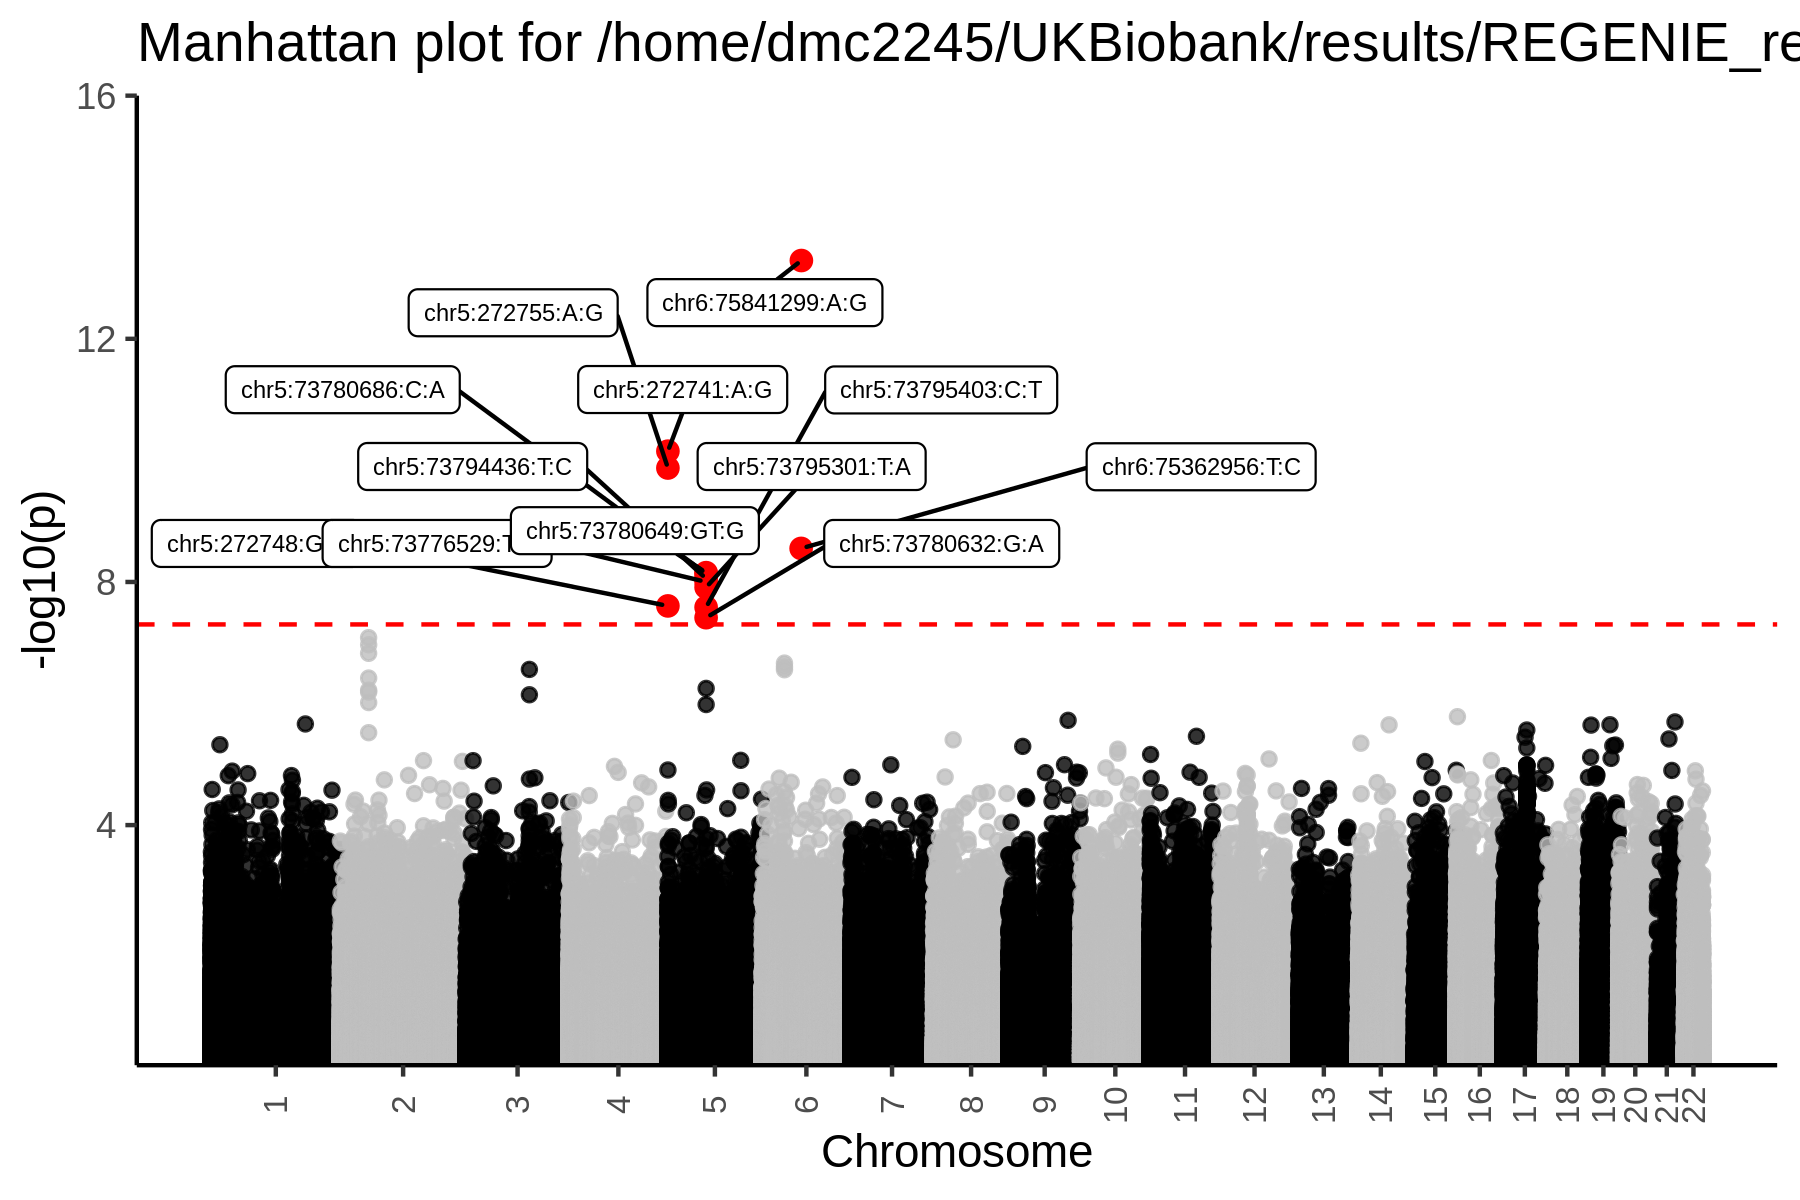

In [22]:
%preview -s png /home/dmc2245/UKBiobank/results/REGENIE_results/results_exome_data/090921_f3393_hearing_aid_200K/090321_UKBB_Hearing_aid_f3393_expandedwhite_6436cases_96601ctrl_PC1_2_f3393.regenie.manhattan_annotated.png